TASK
построить графики для биржевых котировок (двух акций любых), например за час или ежедневные, 
1) считать, 
2) извлечь столбцы необходимые для работы, 
3) для каждого из столбцов, график, распределение, взаимное рассеивание для двух котировок, гистограмму, ряды, характеристики (среднее, медиана, etc), 
4) построить дополнительный столбец – волатильность volp=(h-l)^2 для цены, построить график волатильности

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from pandas.plotting import scatter_matrix

In [2]:
nvidia = pd.read_csv('NVDA-RM.csv', sep=";")
amd = pd.read_csv('AMD-RM.csv', sep=";")

In [3]:
nvidia.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20200824,0,37893.0,38218.0,37800.0,38218.0,30
1,20200825,0,38900.0,45000.0,37728.0,39600.0,3058
2,20200826,0,39650.0,39650.0,38271.0,38600.0,1295
3,20200827,0,38489.0,38744.0,37900.0,38222.0,692
4,20200828,0,38102.0,39078.0,37310.0,38900.0,923


In [4]:
amd.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20200825,0,6254.0,6560.0,6190.0,6549.0,7708
1,20200826,0,6550.0,6676.0,6460.0,6517.0,3635
2,20200827,0,6493.0,6533.0,6234.0,6314.0,2214
3,20200828,0,6250.0,6438.0,6208.0,6277.0,2996
4,20200831,0,6198.0,6889.0,6190.0,6680.0,5407


In [5]:
amd.shape

(64, 7)

In [11]:
nvidia_new = nvidia[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']].copy() 
nvidia_new.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,37893.0,38218.0,37800.0,38218.0
1,38900.0,45000.0,37728.0,39600.0
2,39650.0,39650.0,38271.0,38600.0
3,38489.0,38744.0,37900.0,38222.0
4,38102.0,39078.0,37310.0,38900.0


In [7]:
amd_new = amd[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']].copy()
amd_new.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,6254.0,6560.0,6190.0,6549.0
1,6550.0,6676.0,6460.0,6517.0
2,6493.0,6533.0,6234.0,6314.0
3,6250.0,6438.0,6208.0,6277.0
4,6198.0,6889.0,6190.0,6680.0


In [12]:
nvidia_new['volp']=pow((nvidia_new['<HIGH>']-nvidia_new['<LOW>']),2)
nvidia_new.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,volp
0,37893.0,38218.0,37800.0,38218.0,174724.0
1,38900.0,45000.0,37728.0,39600.0,52881984.0
2,39650.0,39650.0,38271.0,38600.0,1901641.0
3,38489.0,38744.0,37900.0,38222.0,712336.0
4,38102.0,39078.0,37310.0,38900.0,3125824.0


In [17]:
amd_new['volp']=pow((amd_new['<HIGH>']-amd_new['<LOW>']),2)
amd_new.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,volp
0,6254.0,6560.0,6190.0,6549.0,136900.0
1,6550.0,6676.0,6460.0,6517.0,46656.0
2,6493.0,6533.0,6234.0,6314.0,89401.0
3,6250.0,6438.0,6208.0,6277.0,52900.0
4,6198.0,6889.0,6190.0,6680.0,488601.0


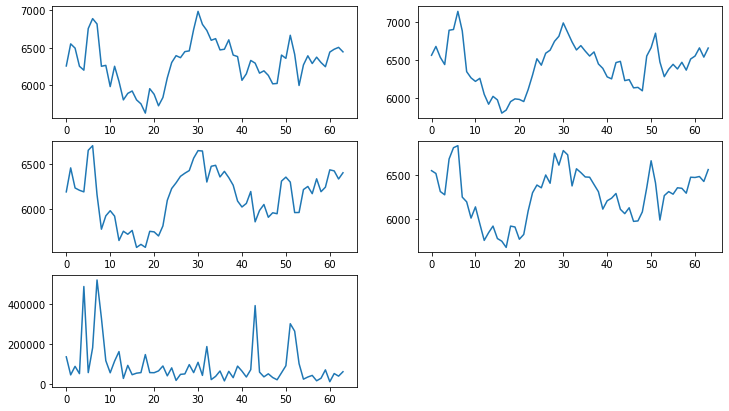

In [73]:
xcol=amd_new.columns.to_list()
plt.figure(figsize=(12, 7))
i = 1
for a in xcol:
    plt.subplot(3, 2, i)
    plt.plot(amd_new[a])
    i+=1

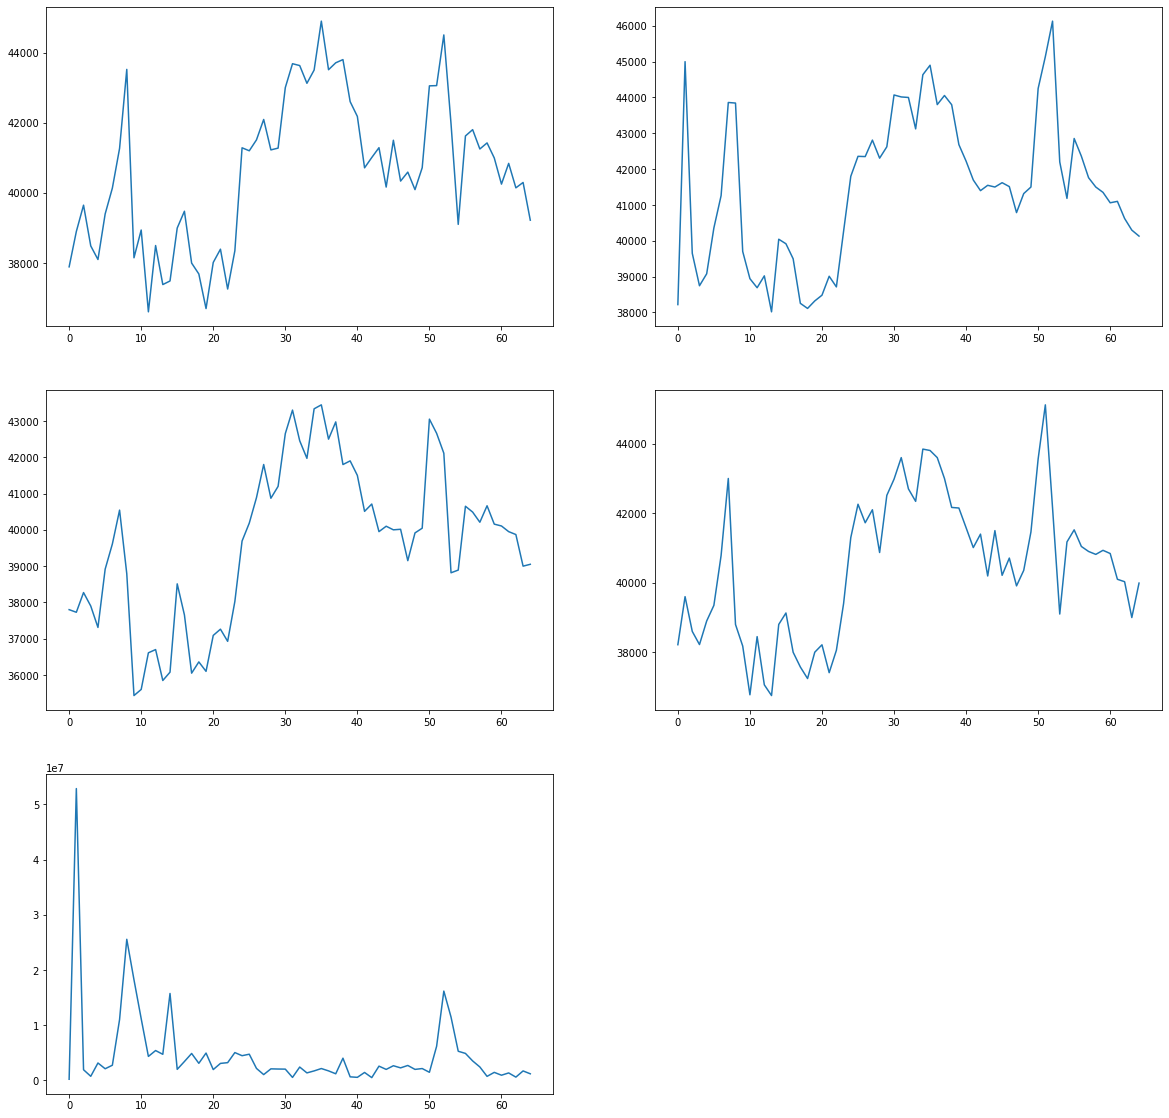

In [32]:
xcol=nvidia_new.columns.to_list()
plt.figure(figsize=(20, 20))
i = 1
for a in xcol:
    plt.subplot(3, 2, i)
    plt.plot(nvidia_new[a])
    i+=1

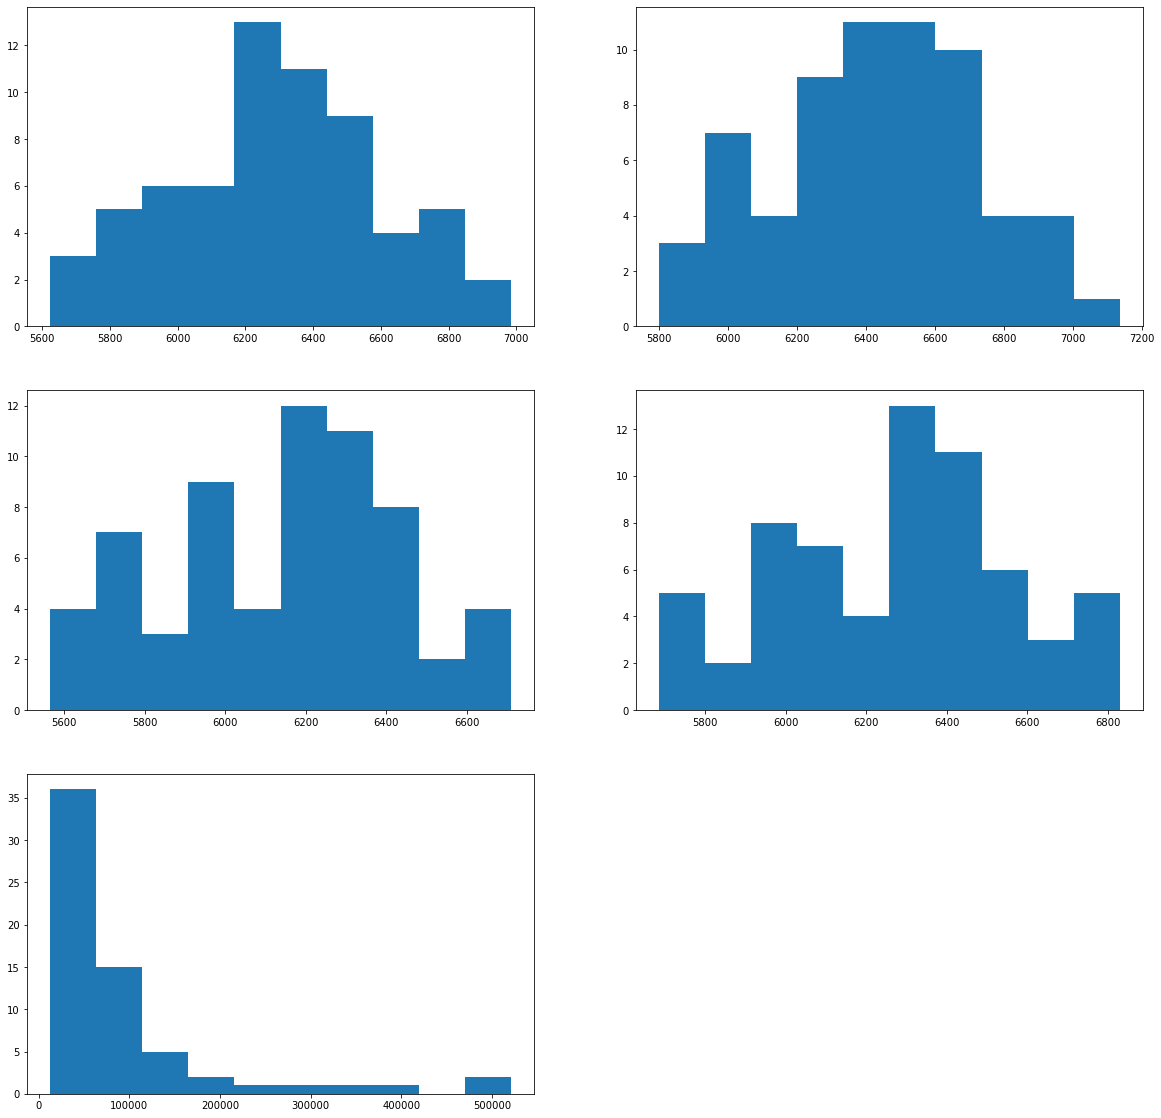

In [29]:
xcol=amd_new.columns.to_list()
plt.figure(figsize=(20, 20))
i = 1
for a in xcol:
    plt.subplot(3, 2, i)
    plt.hist(amd_new[a])
    i+=1

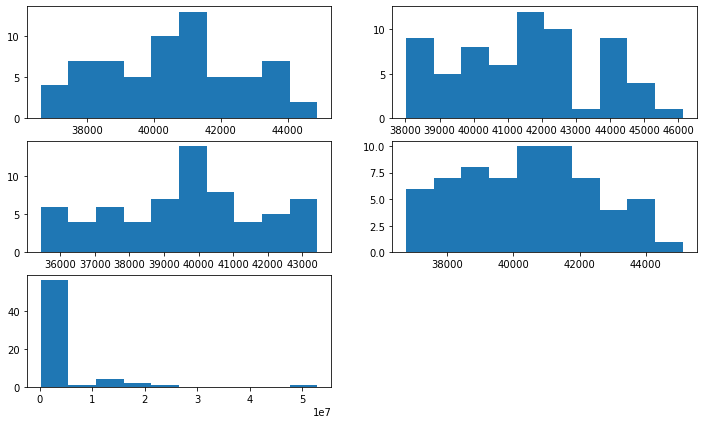

In [14]:
xcol=nvidia_new.columns.to_list()
plt.figure(figsize=(20, 20))
i = 1
for a in xcol:
    plt.subplot(3, 2, i)
    plt.hist(nvidia_new[a])
    i+=1

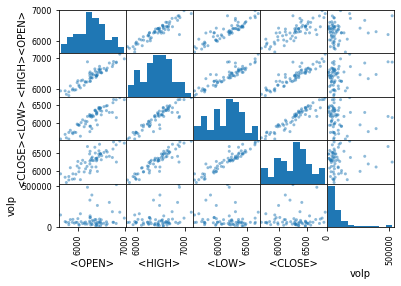

In [24]:
scatter_matrix(amd_new) #матрица рассеивания для AMD
plt.show()

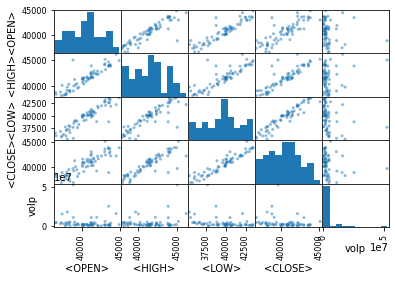

In [26]:
scatter_matrix(nvidia_new) #матрица рассеивания для NVIDIA
plt.show()